In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_car = pd.read_csv('car_age_price.csv')
df_car


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
#Basic_details

df_car.shape

(112, 2)

In [7]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
df_car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [10]:
df_car.isna().sum()

Year     0
Price    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f16424d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f164252d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f16424af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f16425810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f16460d60>],
 'means': []}

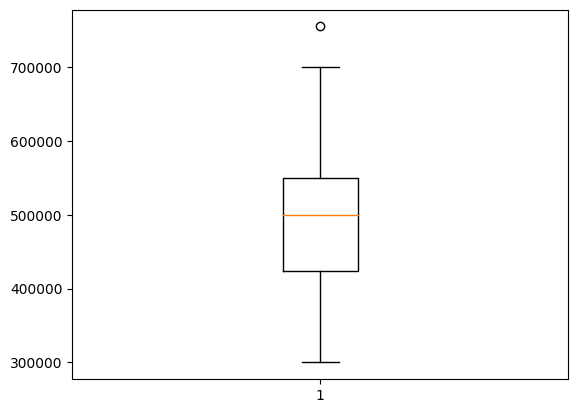

In [19]:
plt.boxplot(df_car['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f1648aaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f1648afe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f1648a920>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f1648b520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f1648b7c0>],
 'means': []}

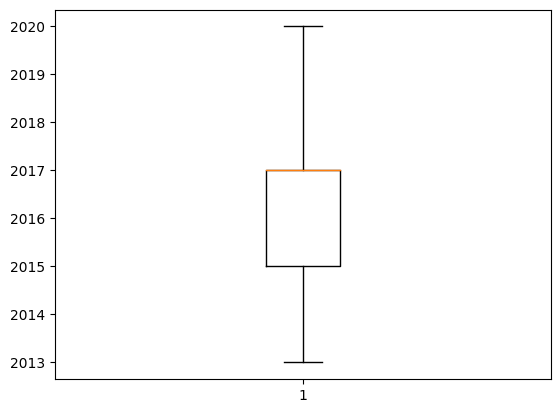

In [20]:
plt.boxplot(df_car['Year'])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score

In [22]:
X = df_car['Year']
y = df_car['Price']
X = df_car.drop(['Price'],axis = 1)

In [24]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
#LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
linear_Prediction = model.predict(X_test)

In [26]:
r2_error = r2_score(y_test,linear_Prediction)
r2_error

0.4347961632108023

In [29]:
MSE = mean_squared_error(y_test,linear_Prediction)
MSE

3878767151.073449

In [30]:
#Lasso_Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
model_lasso_reg = Lasso(alpha=1)
model_lasso_reg.fit(X_train,y_train)
predict_lasso_reg = model_lasso_reg.predict(X_test)


In [33]:
mse_lasso_reg = mean_squared_error(y_test, predict_lasso_reg)
mse_lasso_reg

3878735896.222091

In [34]:
r2_lasso_reg = r2_score(y_test, predict_lasso_reg)
r2_lasso_reg

0.4348007175862566

In [36]:
if MSE < mse_lasso_reg and r2_error > r2_lasso_reg :
    print ("Linear Regression performs better.")
elif mse_lasso_reg < MSE and r2_lasso_reg > r2_error:
    print("Lasso Regression performs better.")
else:
    print("Both models perfrom similarly.")

Lasso Regression performs better.
